Imports the relevant excel files

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import display

HousePrices = pd.read_excel("new data/House Price Paid 2024.xlsx")
MedianSalary = pd.read_excel("new data/Gross Median Salary 2024.xlsx")
Boundaries = pd.read_excel("new data/EW Local Authority Boundaries.xlsx")

In [73]:
HousePrices.head()

,Price,Location
0,185000,NEWHAM
1,220000,NEWHAM
2,340000,SOUTHWARK
3,545000,LEWISHAM
4,625000,LAMBETH


In [74]:
MedianSalary.head()

,Location,LAD code,Median Salary
0,Darlington,E06000005,34146.0
1,Hartlepool,E06000001,32947.0
2,Middlesbrough,E06000002,31638.0
3,Redcar and Cleveland,E06000003,30652.0
4,Stockton-on-Tees,E06000004,31350.0


In [75]:
MedianSalary

,Location,LAD code,Median Salary
0,Darlington,E06000005,34146.0
1,Hartlepool,E06000001,32947.0
2,Middlesbrough,E06000002,31638.0
3,Redcar and Cleveland,E06000003,30652.0
4,Stockton-on-Tees,E06000004,31350.0
...,...,...,...
313,Caerphilly,W06000018,31659.0
314,Blaenau Gwent,W06000019,NaN
315,Torfaen,W06000020,37616.0
316,Monmouthshire,W06000021,37364.0


In [76]:
HousePrices['Location'] = HousePrices['Location'].str.capitalize()
MedianSalary['Location'] = MedianSalary['Location'].str.capitalize()
HousePrices.head()

,Price,Location
0,185000,Newham
1,220000,Newham
2,340000,Southwark
3,545000,Lewisham
4,625000,Lambeth


In [77]:
MedianHousePrices = HousePrices.groupby('Location', as_index=False).agg({'Price': ['median']})
MedianHousePrices

,Location,Price
,,median
0,Adur,362500.0
1,Amber valley,220000.0
2,Arun,335000.0
3,Ashfield,182500.0
4,Ashford,334000.0
...,...,...
313,Wrexham,182000.0
314,Wychavon,325000.0
315,Wyre,180000.0


Converts the multi index column names into normal column names as merges cannot happen between dataframes with different index levels

In [78]:
MedianHousePrices.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in MedianHousePrices.columns]
MedianHousePrices = MedianHousePrices.rename(columns={"Location_": "Location"})
MedianHousePrices = MedianHousePrices.rename(columns={"Price_median": "Median House Price"})
MedianHousePrices

,Location,Median House Price
0,Adur,362500.0
1,Amber valley,220000.0
2,Arun,335000.0
3,Ashfield,182500.0
4,Ashford,334000.0
...,...,...
313,Wrexham,182000.0
314,Wychavon,325000.0
315,Wyre,180000.0
316,Wyre forest,235000.0


In [79]:
MergedData = MedianHousePrices.merge(MedianSalary)
MergedData

,Location,Median House Price,LAD code,Median Salary
0,Adur,362500.0,E07000223,36273.0
1,Amber valley,220000.0,E07000032,33852.0
2,Arun,335000.0,E07000224,33048.0
3,Ashfield,182500.0,E07000170,34192.0
4,Ashford,334000.0,E07000105,33981.0
...,...,...,...,...
313,Wrexham,182000.0,W06000006,33945.0
314,Wychavon,325000.0,E07000238,34437.0
315,Wyre,180000.0,E07000128,30528.0
316,Wyre forest,235000.0,E07000239,32394.0


There are 9 less rows after merging which means that 9 locations did not merge, likely due to the differences in name

In [80]:
MergedData = MedianHousePrices.merge(MedianSalary, on="Location", how="outer", indicator=True)
failed_left = MergedData[MergedData["_merge"] == "left_only"]
failed_right = MergedData[MergedData["_merge"] == "right_only"]
print(failed_right)

Empty DataFrame
Columns: [Location, Median House Price, LAD code, Median Salary, _merge]
Index: []


In [81]:
MergedData = MedianHousePrices.merge(MedianSalary)
MergedData

,Location,Median House Price,LAD code,Median Salary
0,Adur,362500.0,E07000223,36273.0
1,Amber valley,220000.0,E07000032,33852.0
2,Arun,335000.0,E07000224,33048.0
3,Ashfield,182500.0,E07000170,34192.0
4,Ashford,334000.0,E07000105,33981.0
...,...,...,...,...
313,Wrexham,182000.0,W06000006,33945.0
314,Wychavon,325000.0,E07000238,34437.0
315,Wyre,180000.0,E07000128,30528.0
316,Wyre forest,235000.0,E07000239,32394.0


In [82]:
MergedData.dtypes

Location               object
Median House Price    float64
LAD code               object
Median Salary         float64
dtype: object

In [83]:
MergedData['Housing_Affordability_Index'] = (
    (MergedData['Median House Price'] / MergedData['Median Salary'])
)
MergedData

,Location,Median House Price,LAD code,Median Salary,Housing_Affordability_Index
0,Adur,362500.0,E07000223,36273.0,9.993659
1,Amber valley,220000.0,E07000032,33852.0,6.498877
2,Arun,335000.0,E07000224,33048.0,10.136771
3,Ashfield,182500.0,E07000170,34192.0,5.337506
4,Ashford,334000.0,E07000105,33981.0,9.829022
...,...,...,...,...,...
313,Wrexham,182000.0,W06000006,33945.0,5.361614
314,Wychavon,325000.0,E07000238,34437.0,9.437524
315,Wyre,180000.0,E07000128,30528.0,5.896226
316,Wyre forest,235000.0,E07000239,32394.0,7.254430


The larger the affordability index is, the more expensive it is to live at that location, as it means that your salary is very small in comparison to the median house price

<Axes: xlabel='Median Salary', ylabel='Median House Price'>

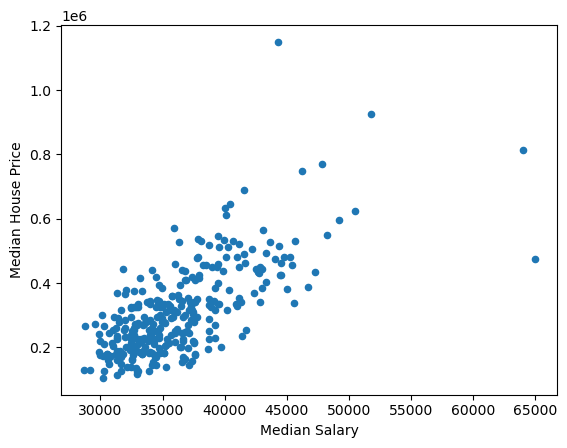

In [84]:
MergedData.plot.scatter(x='Median Salary', y='Median House Price')

In [85]:
MergedData.sort_values(by='Median Salary', ascending = False)

,Location,Median House Price,LAD code,Median Salary,Housing_Affordability_Index
278,Tower hamlets,475000.0,E09000030,64995.0,7.308254
61,City of london,815000.0,E09000001,64008.0,12.732783
301,Westminster,925000.0,E09000033,51815.0,17.851973
138,Islington,625000.0,E09000019,50532.0,12.368400
113,Hackney,595000.0,E09000012,49245.0,12.082445
...,...,...,...,...,...
150,Lewisham,453500.0,E09000023,NaN,NaN
182,North kesteven,230000.0,E07000139,NaN,NaN
188,North warwickshire,247300.0,E07000218,NaN,NaN
216,Rother,360000.0,E07000064,NaN,NaN


The top median salaries make sense as the locations are in central london where there are high paying jobs, and more middle to upper class people live there. 

The places with no median salaries are due to estimates being considered unreliable for practical purposes by the original data source for the gross incomes, based on the coefficient of variation.These are the locations where the coefficient of variation was above 20%.

In [86]:
MergedData.sort_values(by='Housing_Affordability_Index', ascending = False)

,Location,Median House Price,LAD code,Median Salary,Housing_Affordability_Index
139,Kensington and chelsea,1150000.0,E09000020,44300.0,25.959368
301,Westminster,925000.0,E09000033,51815.0,17.851973
212,Richmond upon thames,690000.0,E09000027,41536.0,16.612096
115,Hammersmith and fulham,750000.0,E09000013,46247.0,16.217268
44,Camden,770000.0,E09000007,47882.0,16.081200
...,...,...,...,...,...
150,Lewisham,453500.0,E09000023,NaN,NaN
182,North kesteven,230000.0,E07000139,NaN,NaN
188,North warwickshire,247300.0,E07000218,NaN,NaN
216,Rother,360000.0,E07000064,NaN,NaN


Dacorum's median salary looks unusually low. Upon inspection of the data source I can see that this due to a high number of part time jobs being worked in Dacorum in comparison to full time jobs, where all of these high number of female part time jobs have a very low salary.

In [87]:
MergedData.sort_values(by='Median Salary', ascending = True)

,Location,Median House Price,LAD code,Median Salary,Housing_Affordability_Index
199,Pendle,130000.0,E07000122,28672.0,4.534040
195,Oadby and wigston,268000.0,E07000135,28767.0,9.316230
162,Merthyr tydfil,129000.0,W06000024,29154.0,4.424779
277,Torridge,272500.0,E07000046,29553.0,9.220722
112,Gwynedd,185000.0,W06000002,29852.0,6.197240
...,...,...,...,...,...
150,Lewisham,453500.0,E09000023,NaN,NaN
182,North kesteven,230000.0,E07000139,NaN,NaN
188,North warwickshire,247300.0,E07000218,NaN,NaN
216,Rother,360000.0,E07000064,NaN,NaN


In [ ]:

import geopandas as gpd
EWMap = gpd.read_file("new data/New Data/Local_Authority_Districts_May_2023_EW_BUC_-4641319511456616318.gpkg")
EWMap.plot()

ModuleNotFoundError: No module named 'geopandas'